### Thien Win, PE

### Project: WebMD Drug Scraping

<b>Contact:</b> win.thien@gmail.com <br>
<b>LinkedIn:</b> https://www.linkedin.com/in/thien-win-pe/<br>
<b>GitHub:</b> https://github.com/win-thien<br>

<hr>

The purpose of this notebook is to demonstrate a web scraping technique to go through the WebMD website and obtain information on the top 100 drugs. As with any web scraping endeavor, the first step is to familiarize oneself with the website layout. Use the following link to follow along:

https://www.webmd.com/drugs/2/index

From the link above, it can be seen that WebMD has collated the top 100 drugs with separate links for each drug. Clicking the link brings you to a separate page that has the details on the drug that we are most interested in. However, it is very time consuming to go to each link and obtain its contents. This is where web scraping techniques come in handy!

In order to inspect the page, we want to go to the developer tools (Ctrl+Shift+I on Chrome) and go to the "Elements" tab. By going through the elements, we want to work through the the drop down in the elements until we locate the elements corresponding to the individual links. Here is what it shoud look like: 

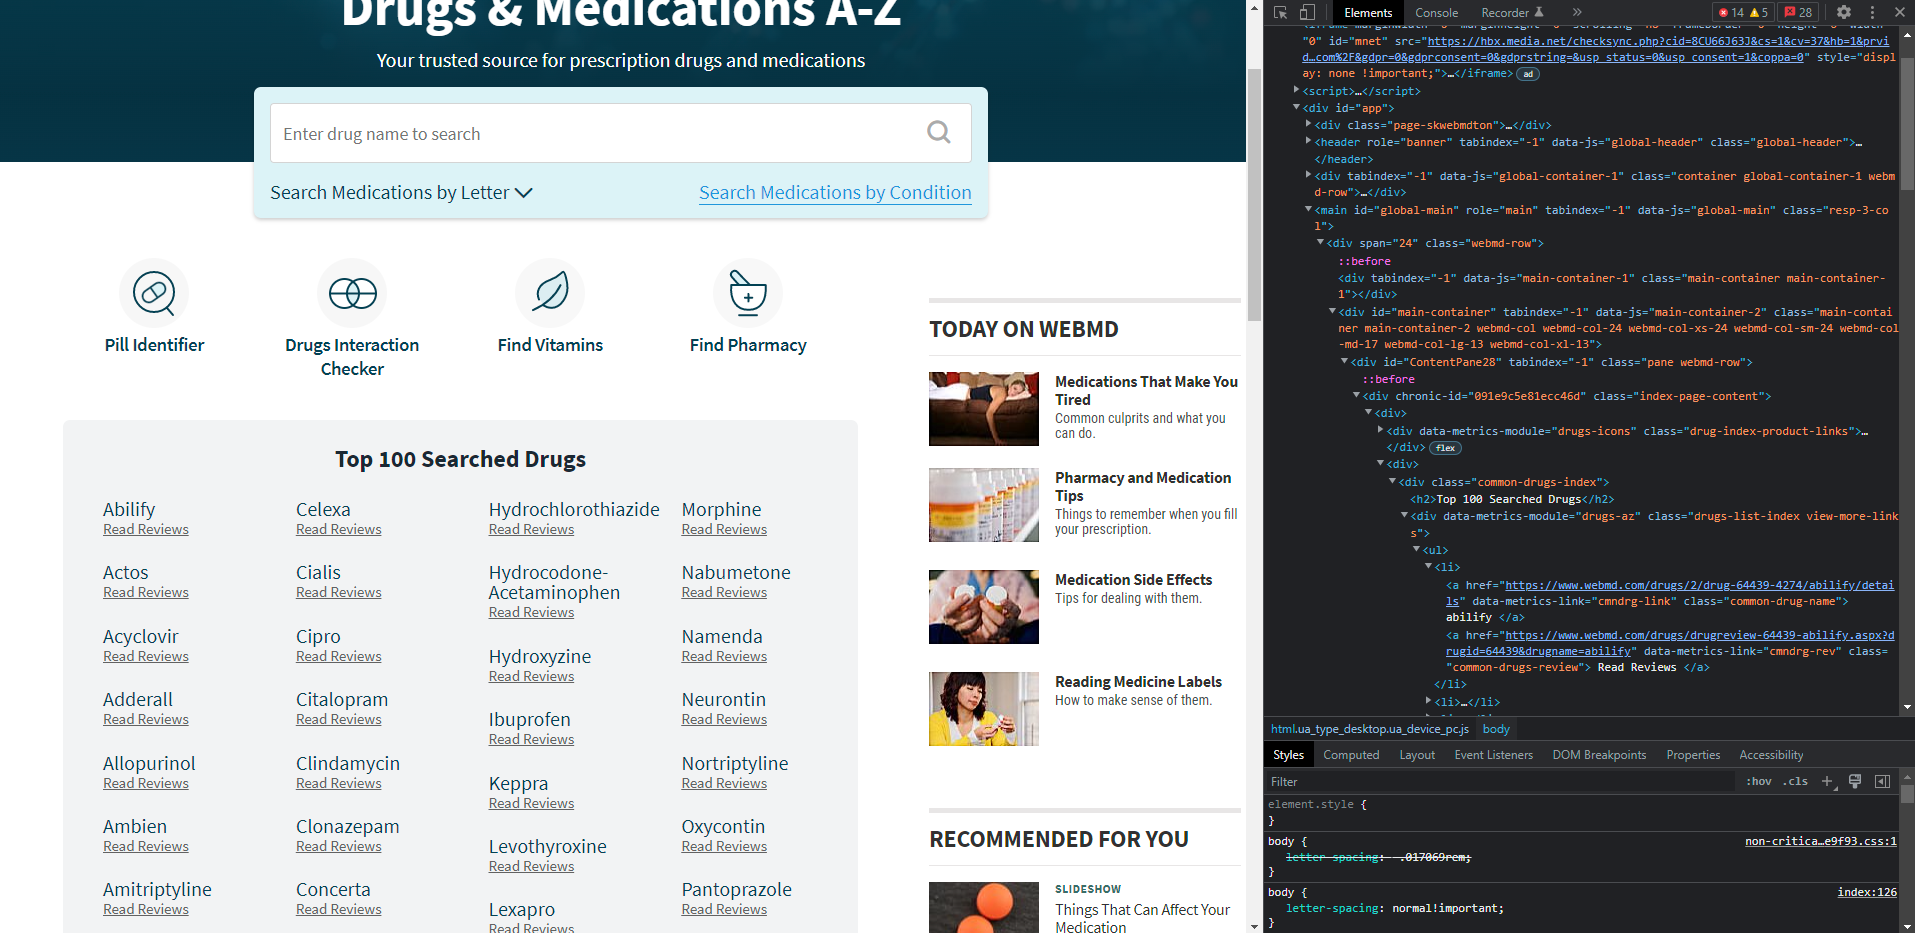

With this information located, we can now begin to scrape this page for the hyperlinks for each drug. 

In [1]:
#import modules and libraries
import pandas as pd
import numpy as np
import requests

#import beautifulsoup for scraping
from bs4 import BeautifulSoup

In order to pull a request from the website, we need to establish the header information. This information can also be found by accessing the developer tools again and navigating to the "Network" tab. Navigate to the "Fetch/XHR" sub-tab and locate/select the document starting with "delivery?client=..." in the left panel. Select the "Headers" tab and scroll to the "Required Headers" section. Copy the "user-agent" information. The location of the the above steps should look something like this:  

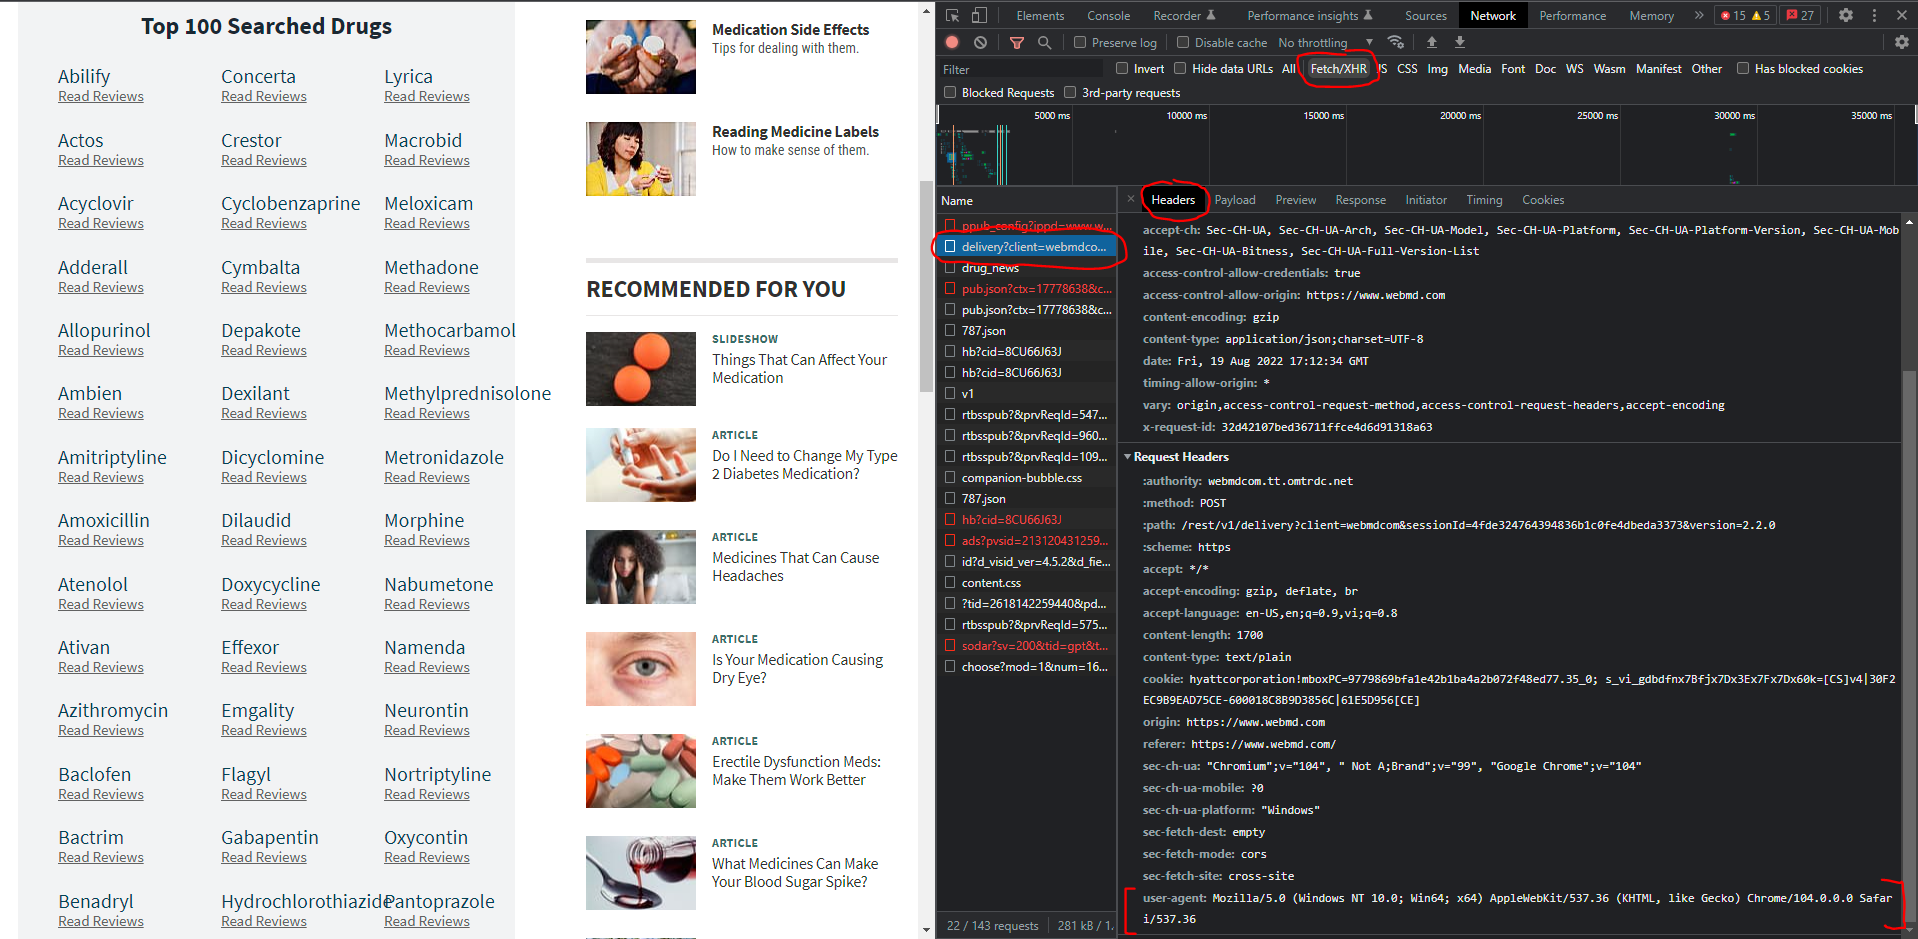

Using the "user-agent" information, we will create the header information and put a request as such:

In [3]:
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'}

In [4]:
url = 'https://www.webmd.com/drugs/2/index'

In [5]:
html = requests.get(url=url, headers = headers)

#check to see if the website is responding. 200 = good, 400 = bad
html.status_code

200

Great! We've successfully put a request to the website. We can inspect the html contents of the page as follows:

In [8]:
#inspect contents
#commented out for brevity
#print(html.content)

The above html code is not very readable. That is where BeautifulSoup shines. We will now create our soup object and instpect.

In [10]:
soup = BeautifulSoup(html.content, 'html.parser')

#commented out for brevity
#soup

That is much better. Now that we have our soup object, we want to extract the links found in the object. We will create and empty list and append the found links to this empty list. Though the header of the page says "Top 100 Searched Drugs", in reality, there are only 73 drugs listed. Ideally, we should have 73 links but most likely not and will require further processing. 

In [14]:
url_list = []
    
for url in soup.find_all('a', href = True):
    url_list.append(url['href'])
    
url_list

['#main-container',
 'https://www.webmd.com',
 '//symptoms.webmd.com/',
 '//doctor.webmd.com',
 '//doctor.webmd.com/dental',
 '//www.webmd.com/connect-to-care/default.htm',
 '//www.webmd.com/rx',
 '//www.webmd.com/a-to-z-guides/common-topics/default.htm',
 '//www.webmd.com/a-to-z-guides/common-topics/default.htm',
 'https://www.webmd.com/add-adhd/default.htm',
 'https://www.webmd.com/allergies/default.htm',
 'https://www.webmd.com/arthritis/default.htm',
 'https://www.webmd.com/cancer/default.htm',
 'https://www.webmd.com/coronavirus',
 'https://www.webmd.com/depression/default.htm',
 'https://www.webmd.com/diabetes/default.htm',
 'https://www.webmd.com/eye-health/default.htm',
 'https://www.webmd.com/heart-disease/default.htm',
 'https://www.webmd.com/lung/default.htm',
 'https://www.webmd.com/orthopedics/default.htm',
 'https://www.webmd.com/pain-management/default.htm',
 'https://www.webmd.com/sexual-conditions/default.htm',
 'https://www.webmd.com/skin-problems-and-treatments/defau

In [15]:
#check list length
len(url_list)

382

The html contained many more links than the expected 73. No problem! We will formulate a method to extract the desired url containing the details page. By going to the details page different drugs, we can see how the url changes. Most noticeably is that the url ends with a "/details". This will be our first filter method. We will write a for loop to check each item in the list to determine if this sub-string exists in url.

In [16]:
sub_string = '/details'

for url in url_list:
    if sub_string not in url:
        url_list.remove(url)

#check length of list after filtering 
len(url_list)

191

We can see that though we were able to remove a majority of the unwanted url's, we are still not at the desired 73. We can repeat the same method by examining the url_list as it stands.

In [17]:
url_list

['//doctor.webmd.com',
 '//www.webmd.com/connect-to-care/default.htm',
 '//www.webmd.com/a-to-z-guides/common-topics/default.htm',
 'https://www.webmd.com/add-adhd/default.htm',
 'https://www.webmd.com/arthritis/default.htm',
 'https://www.webmd.com/coronavirus',
 'https://www.webmd.com/diabetes/default.htm',
 'https://www.webmd.com/heart-disease/default.htm',
 'https://www.webmd.com/orthopedics/default.htm',
 'https://www.webmd.com/sexual-conditions/default.htm',
 'https://www.webmd.com/sleep-disorders/default.htm',
 'https://symptoms.webmd.com/default.htm',
 'https://www.webmd.com/podcasts/default.htm',
 'https://www.webmd.com/a-to-z-guides/qa',
 'https://doctor.webmd.com/home',
 'https://www.webmd.com/a-to-z-guides/surgeries-procedures',
 'https://www.webmd.com/migraines-headaches/ss/slideshow-migraine-overview',
 '//www.webmd.com/drugs/index-drugs.aspx',
 'https://www.webmd.com/baby/guide/taking-medicine-during-pregnancy',
 'https://www.webmd.com/drugs/compare',
 'https://www.webmd

The desired url's starts with the following sub-string 'https://www.webmd.com/drugs/2/drug-'. We can therefore repeat the similar method as before and filter out the desired 73 url's.

In [18]:
sub_string = 'https://www.webmd.com/drugs/2/drug-'
detail_urls = []

for url in url_list:
    if sub_string in url:
        detail_urls.append(url)
        
detail_urls

['https://www.webmd.com/drugs/2/drug-64439-4274/abilify/details',
 'https://www.webmd.com/drugs/2/drug-17410-9309/actos/details',
 'https://www.webmd.com/drugs/2/drug-941-9069/acyclovir/details',
 'https://www.webmd.com/drugs/2/drug-63164-9323/adderall-xr/details',
 'https://www.webmd.com/drugs/2/drug-8610-1/allopurinol/details',
 'https://www.webmd.com/drugs/2/drug-9690-8110/ambien/details',
 'https://www.webmd.com/drugs/2/drug-8611-681/amitriptyline-hcl/details',
 'https://www.webmd.com/drugs/2/drug-1531-1159/amoxicillin-er/details',
 'https://www.webmd.com/drugs/2/drug-11035-5353/atenolol/details',
 'https://www.webmd.com/drugs/2/drug-6685-5244/ativan/details',
 'https://www.webmd.com/drugs/2/drug-1527-3223/azithromycin-tablet-macrolide-antibiotics/details',
 'https://www.webmd.com/drugs/2/drug-8615-7087/baclofen/details',
 'https://www.webmd.com/drugs/2/drug-5530-9071/bactrim-ds/details',
 'https://www.webmd.com/drugs/2/drug-5680-5282/benadryl/details',
 'https://www.webmd.com/drug

In [19]:
#check length
len(detail_urls)

73

We have successfully extracted the desired links. Now, what do we do with them? The principle is scrap each of these url's to start populating a data frame with desired information. As usual, the first step before scraping any page is to understand the page layout as before. After looking at several of the pages, I have decided to populate a data frame with the drug name, the generic name, the uses, warnings, the side effects, what to do when you miss a dose, and storage. 

The principle is to perform a similar process as before in getting the html, creating a soup object, and extracting the desired information for each url. Let's first make sure we aren't getting any error when trying to access the page. 

In [21]:
for url in detail_urls:
    html = requests.get(url=url, headers = headers)
    if html.status_code != 200:
        print(url, html.status_code)
    else:
        pass

No errors! Let's continue with creating the soup object and extracting the information. We will start with the first tab "Uses" and work through the tabs until we gather all the information we want.

In [22]:
#create list for soup objects to be used further on
soup_list = []

#create different lists for information
name_list = []
generic_list = []
warning_list = []
use_list = []

for url in detail_urls:
    html = requests.get(url=url, headers = headers)
    soup = BeautifulSoup(html.content, 'html.parser')
    soup_list.append(soup)
    
    #need to use try and except method because it was found not every drug on the list has a associated warning section   
    try: 
        warning = soup.find(class_="fda-warning")
        warning_list.append(warning.text)
    except Exception:
        warning_list.append('Not Available')
        
    drug_name = soup.find(class_="drug-name")
    generic = soup.find(class_="drug-generic-name")
    use = soup.find(class_="monograph-content")

    name_list.append(drug_name.text)
    generic_list.append(generic.text)
    use_list.append(use.text)


Now that we have the list of information, we can build the data frame with the different lists as our columns. It should looks something like this:

In [23]:
data = [name_list,
        generic_list,
        warning_list,
        use_list]

df = pd.DataFrame(data=data).T
df.columns = ['Drug Name', 'Generic Name', 'Warnings', 'Use']
df

,Drug Name,Generic Name,Warnings,Use
0,"Abilify - Uses, Side Effects, and More",Generic Name(S): aripiprazole,Warnings: If you are using aripiprazole in co...,Aripiprazole is used to treat certain mental/m...
1,"Actos - Uses, Side Effects, and More",Generic Name(S): pioglitazone,Warnings: Pioglitazone may rarely cause or wo...,Pioglitazone is a diabetes drug (thiazolidined...
2,"Acyclovir - Uses, Side Effects, and More",Common Brand(S): Zovirax,Not Available,Acyclovir is used to treat infections caused b...
3,"Adderall XR - Uses, Side Effects, and More",Generic Name(S): dextroamphetamine-amphetamine,Warnings: Misuse or abuse of amphetamines may...,This combination medication is used to treat a...
4,"Allopurinol - Uses, Side Effects, and More",Common Brand(S): Zyloprim,Not Available,Allopurinol is used to treat gout and certain ...
...,...,...,...,...
68,"Prozac Capsule - Uses, Side Effects, and More",Generic Name(S): fluoxetine,Warnings: Antidepressant medications are used...,"Fluoxetine is used to treat depression, panic ..."
69,"Tramadol HCL ER - Uses, Side Effects, and More","Common Brand(S): ConZip, Ryzolt, Ultram ER",Warnings: Tramadol has a risk for abuse and a...,See also Warning section.This medication is us...
70,"Trazodone HCL - Uses, Side Effects, and More",Common Brand(S): Desyrel,Warnings: Antidepressant medications are used...,This medication is used to treat depression. I...
71,"Trulicity Pen Injector - Uses, Side Effects, ...",Generic Name: dulaglutide,Warnings: This medication can cause a certain...,Read the Medication Guide and Instructions for...


Great! Though some of the columns are a little messy and contain unnecessary information. Let's clean it up with the following. 

In [24]:
name = df['Drug Name'].str.split(pat = '-', expand = True)
df['Drug Name'] = name[0]

g_name = df['Generic Name'].str.split(pat = ':', expand = True)
df['Generic Name'] = g_name[1].str.title()

warn = df['Warnings'].str.split(pat = ':', expand = True)
df['Warnings'] = warn[1]
df['Warnings'].fillna('Not Available', inplace=True)

In [25]:
df

,Drug Name,Generic Name,Warnings,Use
0,Abilify,Aripiprazole,If you are using aripiprazole in combination ...,Aripiprazole is used to treat certain mental/m...
1,Actos,Pioglitazone,Pioglitazone may rarely cause or worsen a cer...,Pioglitazone is a diabetes drug (thiazolidined...
2,Acyclovir,Zovirax,Not Available,Acyclovir is used to treat infections caused b...
3,Adderall XR,Dextroamphetamine-Amphetamine,Misuse or abuse of amphetamines may cause ser...,This combination medication is used to treat a...
4,Allopurinol,Zyloprim,Not Available,Allopurinol is used to treat gout and certain ...
...,...,...,...,...
68,Prozac Capsule,Fluoxetine,Antidepressant medications are used to treat ...,"Fluoxetine is used to treat depression, panic ..."
69,Tramadol HCL ER,"Conzip, Ryzolt, Ultram Er","Tramadol has a risk for abuse and addiction, ...",See also Warning section.This medication is us...
70,Trazodone HCL,Desyrel,Antidepressant medications are used to treat ...,This medication is used to treat depression. I...
71,Trulicity Pen Injector,Dulaglutide,This medication can cause a certain type of t...,Read the Medication Guide and Instructions for...


That looks much better. We can move onto the "Side Effects" tab and perform a similar find, appending to list, and cleaning function.

In [26]:
sfx_list = []

for soup in soup_list:
    sfx = soup.find('div', class_="side-effects-container")
    sfx_list.append(sfx.text)
    
df['Side Effects'] = sfx_list

#Removing first two words ('Side Effects') of the string
df['Side Effects'] = df['Side Effects'].str.split(n=2).str[2:]
df['Side Effects'] = [' '.join(map(str,l)) for l in df['Side Effects']]
df

,Drug Name,Generic Name,Warnings,Use,Side Effects
0,Abilify,Aripiprazole,If you are using aripiprazole in combination ...,Aripiprazole is used to treat certain mental/m...,"See also Warning section.Dizziness, lightheade..."
1,Actos,Pioglitazone,Pioglitazone may rarely cause or worsen a cer...,Pioglitazone is a diabetes drug (thiazolidined...,"See also Warning section.Sore throat, muscle p..."
2,Acyclovir,Zovirax,Not Available,Acyclovir is used to treat infections caused b...,"Nausea, diarrhea, headache, or vomiting may oc..."
3,Adderall XR,Dextroamphetamine-Amphetamine,Misuse or abuse of amphetamines may cause ser...,This combination medication is used to treat a...,"Loss of appetite, weight loss, dry mouth, stom..."
4,Allopurinol,Zyloprim,Not Available,Allopurinol is used to treat gout and certain ...,"Stomach upset, nausea, diarrhea, or drowsiness..."
...,...,...,...,...,...
68,Prozac Capsule,Fluoxetine,Antidepressant medications are used to treat ...,"Fluoxetine is used to treat depression, panic ...","See also Warning section.Nausea, drowsiness, d..."
69,Tramadol HCL ER,"Conzip, Ryzolt, Ultram Er","Tramadol has a risk for abuse and addiction, ...",See also Warning section.This medication is us...,"See also Warning section.Nausea, vomiting, con..."
70,Trazodone HCL,Desyrel,Antidepressant medications are used to treat ...,This medication is used to treat depression. I...,"See also the Warning section.Nausea, vomiting,..."
71,Trulicity Pen Injector,Dulaglutide,This medication can cause a certain type of t...,Read the Medication Guide and Instructions for...,"See also Warning section.Nausea, diarrhea, vom..."


We have successful scraped the "Side Effects" tab and move onto the "Overdose" tab. Upon inspection of the elements of the tab, much of the container uses the same class name so that we can easily pull the 'Missed Dose' and 'Storage' information. No problem! We will just scrape the whole container and go from there to separate.

In [27]:
dose_list = []

for url in detail_urls:
    html = requests.get(url=url, headers=headers)
    soup = BeautifulSoup(html.content, 'html.parser')
    
    dose = soup.find('div', class_="overdose-container")
    dose_list.append(dose.text)

Inspecting a few items in the list, we can see that we could split the string at the 'Missed Dose' and 'Storage' text.   

In [28]:
miss_dose_list = []
storage_list = []

for dose in dose_list:
    first_split = dose.split(' Missed Dose ')[1]
    miss_dose = first_split.split(' Storage ')[0]
    storage = first_split.split(' Storage ')[1]
    
    miss_dose_list.append(miss_dose)
    storage_list.append(storage)
    
df['Missed Dose'] = miss_dose_list
df['Storage'] = storage_list

#sanity check
df

,Drug Name,Generic Name,Warnings,Use,Side Effects,Missed Dose,Storage
0,Abilify,Aripiprazole,If you are using aripiprazole in combination ...,Aripiprazole is used to treat certain mental/m...,"See also Warning section.Dizziness, lightheade...","If you miss a dose, take it as soon as you rem...",Store the tablet and the oral liquid at room t...
1,Actos,Pioglitazone,Pioglitazone may rarely cause or worsen a cer...,Pioglitazone is a diabetes drug (thiazolidined...,"See also Warning section.Sore throat, muscle p...","If you miss a dose, use it as soon as you reme...",Store at room temperature away from light and ...
2,Acyclovir,Zovirax,Not Available,Acyclovir is used to treat infections caused b...,"Nausea, diarrhea, headache, or vomiting may oc...","If you miss a dose, take it as soon as you rem...",Store at room temperature away from light and ...
3,Adderall XR,Dextroamphetamine-Amphetamine,Misuse or abuse of amphetamines may cause ser...,This combination medication is used to treat a...,"Loss of appetite, weight loss, dry mouth, stom...","If you miss a dose, take it as soon as you rem...",Store at room temperature away from light and ...
4,Allopurinol,Zyloprim,Not Available,Allopurinol is used to treat gout and certain ...,"Stomach upset, nausea, diarrhea, or drowsiness...","If you miss a dose, take it as soon as you rem...",Store at room temperature away from light and ...
...,...,...,...,...,...,...,...
68,Prozac Capsule,Fluoxetine,Antidepressant medications are used to treat ...,"Fluoxetine is used to treat depression, panic ...","See also Warning section.Nausea, drowsiness, d...","If you miss a dose, take it as soon as you rem...",Store at room temperature away from light and ...
69,Tramadol HCL ER,"Conzip, Ryzolt, Ultram Er","Tramadol has a risk for abuse and addiction, ...",See also Warning section.This medication is us...,"See also Warning section.Nausea, vomiting, con...","If you miss a dose, take it as soon as you rem...",Store at room temperature away from moisture. ...
70,Trazodone HCL,Desyrel,Antidepressant medications are used to treat ...,This medication is used to treat depression. I...,"See also the Warning section.Nausea, vomiting,...","If you miss a dose, take it as soon as you rem...",Store at room temperature away from light and ...
71,Trulicity Pen Injector,Dulaglutide,This medication can cause a certain type of t...,Read the Medication Guide and Instructions for...,"See also Warning section.Nausea, diarrhea, vom...","If you miss a dose, use it as soon as you reme...",Store in the refrigerator. Do not freeze. This...


The dataframe has been successfully populated with the scraped information and concludes this notebook.